Version modifiable en ligne : 
* https://colab.research.google.com/github/agregation-chimie-ens-lyon/codes-python/blob/main/chimie-analytique/Etalonnage-Bleu-Brilliant-par-Monte-Carlo.ipynb

In [1]:
# modifié de https://eduscol.education.fr/document/16051/download
##MONTE CARLO POUR TROUVER L'INCERTITUDE SUR LES CONCENTRATIONS DES SOLUTIONS ETALONS

import numpy as np

# Renvoie une valeur aléatoire de la variable L[0] d'incertitude-type L[1]
def Alea(L):
    tirage = np.random.normal()  # Tirage entre -infini et +infini (loi normale)
    return L[0] + L[1] * tirage


##########################################################################
# Entrées
m = [297.0e-3, 1.0e-3]
Vf1 = [1.0000, 0.0008]
Dilutions = [9e-3, 8e-3, 5.00e-3, 3e-3, 2e-3, 1e-3, 0.8e-3, 0.5e-3, 0.3e-3]
Fioles = [10.00e-3, 0.08e-3]
DeltaBurette = 0.05e-3

##########################################################################
# Préparation de la liste des concentrations des solutions diluées
Cm = m[0] / (Vf1[0])

Concentration = []
for k in range(len(Dilutions)):
    Concentration.append(Cm * Dilutions[k] / Fioles[0])
##########################################################################
# Méthode de Monte Carlo pour trouver l'incertitude sur C
# sans composition des incertitudes

for k in range(len(Dilutions)):
    Dilu = [Dilutions[k], DeltaBurette]

    LC = []
    iteration = 100000

    for i in range(iteration):
        AleaCm = Alea(m) / (Alea(Vf1))
        AleaC = (AleaCm * Alea(Dilu)) / Alea(Fioles)
        LC.append(AleaC)

    MoyC = sum(LC) / iteration
    uC = (1 / (iteration - 1) * sum((np.array(LC) - MoyC) ** 2.0)) ** 0.5

    print("Tube n°", k + 1)
    print("Calcul de C :", Concentration[k])
    print("Moyenne des C :", MoyC)
    print("u(C) :", uC)
##########################################################################

Tube n° 1
Calcul de C : 0.2672999999999999
Moyenne des C : 0.2673171338319732
u(C) : 0.0027598046278257474
Tube n° 2
Calcul de C : 0.2376
Moyenne des C : 0.23760366775008523
u(C) : 0.0025530100949919103
Tube n° 3
Calcul de C : 0.1485
Moyenne des C : 0.14850358763829904
u(C) : 0.00196686546183371
Tube n° 4
Calcul de C : 0.0891
Moyenne des C : 0.08910787045056613
u(C) : 0.0016778944327977198
Tube n° 5
Calcul de C : 0.0594
Moyenne des C : 0.05941110410814335
u(C) : 0.001572271861904932
Tube n° 6
Calcul de C : 0.0297
Moyenne des C : 0.029703788158650594
u(C) : 0.0015086019249192708
Tube n° 7
Calcul de C : 0.02376
Moyenne des C : 0.023754839868076916
u(C) : 0.0014987257526332324
Tube n° 8
Calcul de C : 0.01485
Moyenne des C : 0.014850855837289243
u(C) : 0.0014897999135664109
Tube n° 9
Calcul de C : 0.008909999999999998
Moyenne des C : 0.008916636913972183
u(C) : 0.0014914495684663117


Pente : 139.71740683099048
u(Pente) : 14.592640571936307


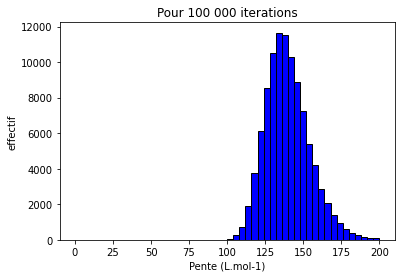

Ordonnee à l origine : -0.00043125227618767513
u(Ordonnée à l origine) 0.004983825838416165


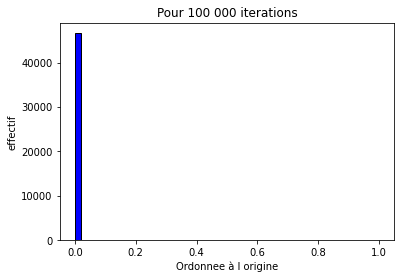

In [2]:
# modifié de https://eduscol.education.fr/document/16051/download
##MONTE CARLO POUR TROUVER L'INCERTITUDE SUR LA PENTE ET L'ORDONNEE A L'ORIGINE DE LE DROITE D'ETALONNAGE

import numpy as np
from matplotlib import pyplot

# Procedure Regression Linéaire ; tableaux np X et Y
def RegLin(X, Y):
    N = len(X)
    moyX = sum(X) / N
    moyY = sum(Y) / N
    pente = sum((X - moyX) * (Y - moyY)) / (sum((X - moyX) ** 2))
    ordor = moyY - pente * moyX
    return [pente, ordor]


##########################################################################
# Renvoie une valeur aléatoire de la variable L[0] d'incertitude-type L[1]
def Alea(L):
    tirage = np.random.normal()  # Tirage entre -infini et +infini (loi normale)
    return L[0] + L[1] * tirage


##########################################################################
# Entrées (groupe 1)
m = [10.0e-3, 1.0e-3]
Vf1 = [1.0000, 0.0008]
Dilutions = [9e-3, 8e-3, 5.00e-3, 3e-3, 2e-3, 1e-3, 0.8e-3, 0.5e-3, 0.3e-3]
Fioles = [10.00e-3, 0.08e-3]
DeltaBurette = 0.05e-3
Absorbance = [1.25, 1.10, 0.69, 0.42, 0.27, 0.14, 0.11, 0.07, 0.04]
ErelSpectro = 0.02
##########################################################################
# Préparation des listes avec incertitudes
Dilu = []
for k in range(len(Dilutions)):
    Dilu.append([Dilutions[k], DeltaBurette])
A = []
for k in range(len(Dilutions)):
    A.append([Absorbance[k], Absorbance[k] * ErelSpectro])
##########################################################################
14  # Méthode de Monte Carlo pour trouver la pente, l'ordonnée à l'origine et
# les incertitudes-type
LPente, LOrdOr = [], []
Iteration = 100000

for j in range(Iteration):
    AleaCm = Alea(m) / Alea(Vf1)
    AleaC = []
    AleaA = []
    for k in range(len(Dilutions)):
        AleaC.append((AleaCm * Alea(Dilu[k])) / Alea(Fioles))
        AleaA.append(Alea(A[k]))

    Pente = RegLin(np.array(AleaC), np.array(AleaA))[0]
    OrdOr = RegLin(np.array(AleaC), np.array(AleaA))[1]
    LPente.append(Pente)
    LOrdOr.append(OrdOr)

MoyPente = sum(LPente) / Iteration
MoyOrdOr = sum(LOrdOr) / Iteration
uPente = (1 / (Iteration - 1) * sum((np.array(LPente) - MoyPente) ** 2.0)) ** 0.5
uOrdOr = (1 / (Iteration - 1) * sum((np.array(LOrdOr) - MoyOrdOr) ** 2.0)) ** 0.5

print("Pente :", MoyPente)
print("u(Pente) :", uPente)
pyplot.hist(LPente, range=(0, 200), bins=50, color="blue", edgecolor="black")
pyplot.xlabel("Pente (L.mol-1)")
pyplot.ylabel("effectif")
pyplot.title("Pour 100 000 iterations")
pyplot.show()
print("Ordonnee à l origine :", MoyOrdOr)
print("u(Ordonnée à l origine)", uOrdOr)
pyplot.hist(LOrdOr, range=(0, 1), bins=50, color="blue", edgecolor="black")
pyplot.xlabel("Ordonnee à l origine")
pyplot.ylabel("effectif")
pyplot.title("Pour 100 000 iterations")
pyplot.show()
##########################################################################

Ordonnée pour le report : 0.665
Abscisse moyenne du report : 0.00481035846712528
Incertitude-type de l abscisse du report : 0.0004930896340484891


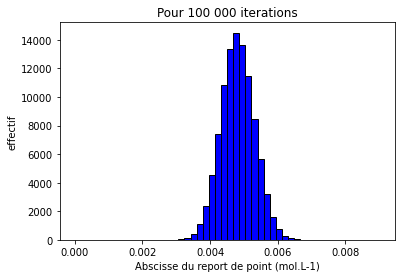

In [4]:
# modifié de https://eduscol.education.fr/document/16051/download
##MONTE CARLO POUR TROUVER L'INCERTITUDE SUR LA CONCENTRATION INCONNUE

import numpy as np
from matplotlib import pyplot

# Procedure Regression Linéaire ; tableaux np X et Y


def RegLin(X, Y):
    N = len(X)
    moyX = sum(X) / N
    moyY = sum(Y) / N
    pente = sum((X - moyX) * (Y - moyY)) / (sum((X - moyX) ** 2))
    ordor = moyY - pente * moyX
    return [pente, ordor]


##########################################################################
# Renvoie une valeur aléatoire de la variable L[0] d'incertitude-type L[1]
def Alea(L):
    tirage = np.random.normal()  # Tirage entre -infini et +infini (loi normale)
    return L[0] + L[1] * tirage


##########################################################################
# Entrées (groupe 1)
m = [10.0e-3, 1.0e-3]
Vf1 = [1.0000, 0.0008]
Dilutions = [9e-3, 8e-3, 5.00e-3, 3e-3, 2e-3, 1e-3, 0.8e-3, 0.5e-3, 0.3e-3]
Fioles = [10.00e-3, 0.08e-3]
DeltaBurette = 0.05e-3
Absorbance = [1.25, 1.10, 0.69, 0.42, 0.27, 0.14, 0.11, 0.07, 0.04]
ErelSpectro = 0.02
Report = [0.665, 0.02 * 0.665]
##########################################################################
# Préparation des listes avec incertitudes
Dilu = []
for k in range(len(Dilutions)):
    Dilu.append([Dilutions[k], DeltaBurette])
A = []
for k in range(len(Dilutions)):
    A.append([Absorbance[k], Absorbance[k] * ErelSpectro])
##########################################################################
14  # Méthode de Monte Carlo pour trouver la pente, l'ordonnée à l'origine et
# les incertitudes-type
LPente, LOrdOr = [], []
LPreviX = []
Iteration = 100000

for j in range(Iteration):
    AleaCm = Alea(m) / Alea(Vf1)
    AleaC = []
    AleaA = []
    for k in range(len(Dilutions)):
        AleaC.append((AleaCm * Alea(Dilu[k])) / Alea(Fioles))
        AleaA.append(Alea(A[k]))
        AleaReport = Alea(Report)

    Pente = RegLin(np.array(AleaC), np.array(AleaA))[0]
    OrdOr = RegLin(np.array(AleaC), np.array(AleaA))[1]
    LPente.append(Pente)
    LOrdOr.append(OrdOr)
    LPreviX.append((AleaReport - OrdOr) / Pente)

MoyPreviX = sum(LPreviX) / Iteration
uPreviX = (1 / (Iteration - 1) * sum((np.array(LPreviX) - MoyPreviX) ** 2.0)) ** 0.5

print("Ordonnée pour le report :", Report[0])
print("Abscisse moyenne du report :", MoyPreviX)
print("Incertitude-type de l abscisse du report :", uPreviX)
pyplot.hist(LPreviX, range=(8.5e-6, 9e-3), bins=50, color="blue", edgecolor="black")
pyplot.xlabel("Abscisse du report de point (mol.L-1)")
pyplot.ylabel("effectif")
pyplot.title("Pour 100 000 iterations")
pyplot.show()
##########################################################################